In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2015-01-01'
end = '2023-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,26.138908,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,25.594027,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,25.000832,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,24.958000,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,25.036694,67071641
...,...,...,...,...,...,...,...
2259,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.557770,18494700
2260,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.657669,11170100
2261,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.279236,17288400
2262,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.119415,12192500


In [8]:
movingaverage_100 = data.Close.rolling(100).mean()

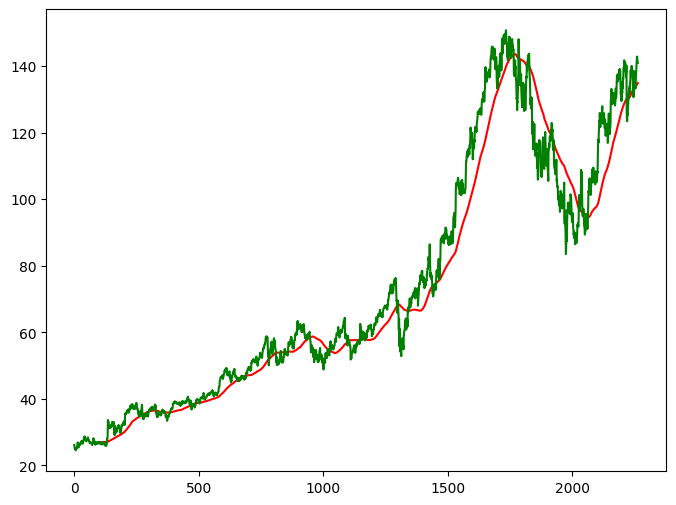

In [9]:
plt.figure(figsize = (8,6))
plt.plot(movingaverage_100, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
movingaverage_200 = data.Close.rolling(200).mean()

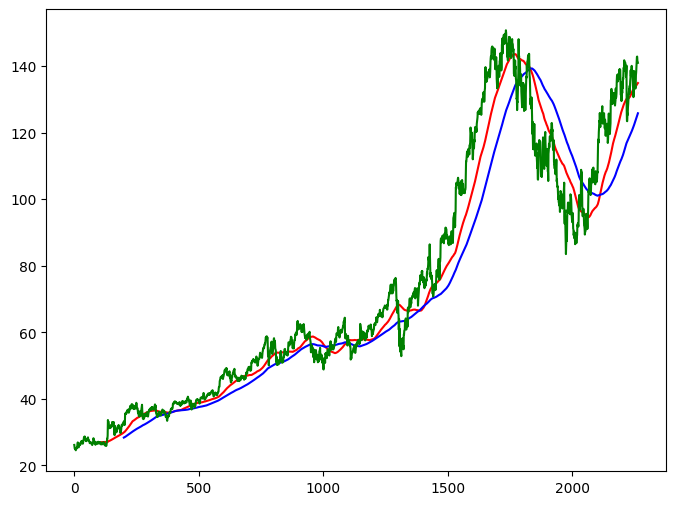

In [11]:
plt.figure(figsize = (8,6))
plt.plot(movingaverage_100, 'r')
plt.plot(movingaverage_200, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [12]:
data.dropna(inplace=True)

In [13]:
train_data = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
test_data = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
train_data.shape[0]

1811

In [15]:
test_data.shape[0]

453

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(train_data)

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [19]:
x, y = np.array(x), np.array(y)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0023
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0023
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0019
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0020
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0025
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0020
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0020
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0021
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0023
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0020
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0019
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0024
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0026
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0019
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - lo

In [29]:
pass_100_days = train_data.tail(100)

In [30]:
test_data = pd.concat([pass_100_days, test_data], ignore_index = True)

In [31]:
data_test_scale = scaler.fit_transform(test_data)

In [32]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [33]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [34]:
scale = 1/scaler.scale_

In [35]:
y_predict = y_predict*scale

In [36]:
y = y*scale

In [2]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [1]:
model.save('Rowa Stock Market Predictor.keras')

NameError: name 'model' is not defined